# 2 Sampling via transformation of coordinates

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np

In [2]:
def load(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
        lines = text.split("\n")
        data = [tuple(map(float, line.split())) for line in lines if line.strip()]
    variables = list(zip(*data))

    return variables

## 2.1 Sampling uniformly points within a unit radius disk

In order to sample uniformly within a unit radius disk, one could consider two point $\xi_1$ and $xi_2$ sampled from a uniform distribution $U(0,1)$:
$$
r = \xi_1, \qquad \theta = 2 \pi \xi_2 \rightarrow x = r cos(\theta), \quad y = r sin(\theta)
$$

However, how it is evident in the plot below, using this strategy the sampled points are not uniformly distributed within the circle, as they tend to concentrate more towards the center of the disk.

This concentration occurs because the radius is not uniformly distributed. To understand this behavior, consider a section with radius $r$ contained on a circle with $R=1$. The probability that the smaller circle $r$ is inside the bigger one is the ratio of the two areas, and in particular it defines the cumultative density:
$$
F(r) = P(r \le R) = \frac{A(r)}{A(1)} = \frac{\pi r^2}{\pi} = r^2,\qquad   0 \le r \le 1
$$
Consequently, we can derive the probability density function (pdf) for $r$ as:
$$
f(r) \propto r,\qquad  0 \le r \le 1
$$
The distribution is not uniform and demonstrate why the points tends to accumulate near the origin. To transform it into a uniform distribution, we can apply the square root operation, because if $F(r) \propto r$, then $f(r) \propto const$. 
The outcomes of this transformation are presented in the second row.

The results are obtained using a C++ script (**ex2.1.cpp** in attachment), in which is possible to choose a modality (0 for the first, incorrect, technique or 1 for the correct one) and the number of points to sample.

In [3]:
n = [100, 500, 1000, 5000]
c = [0,1]
colors = ["orange","aquamarine"]
string = ["r", "sqrt(r)"]

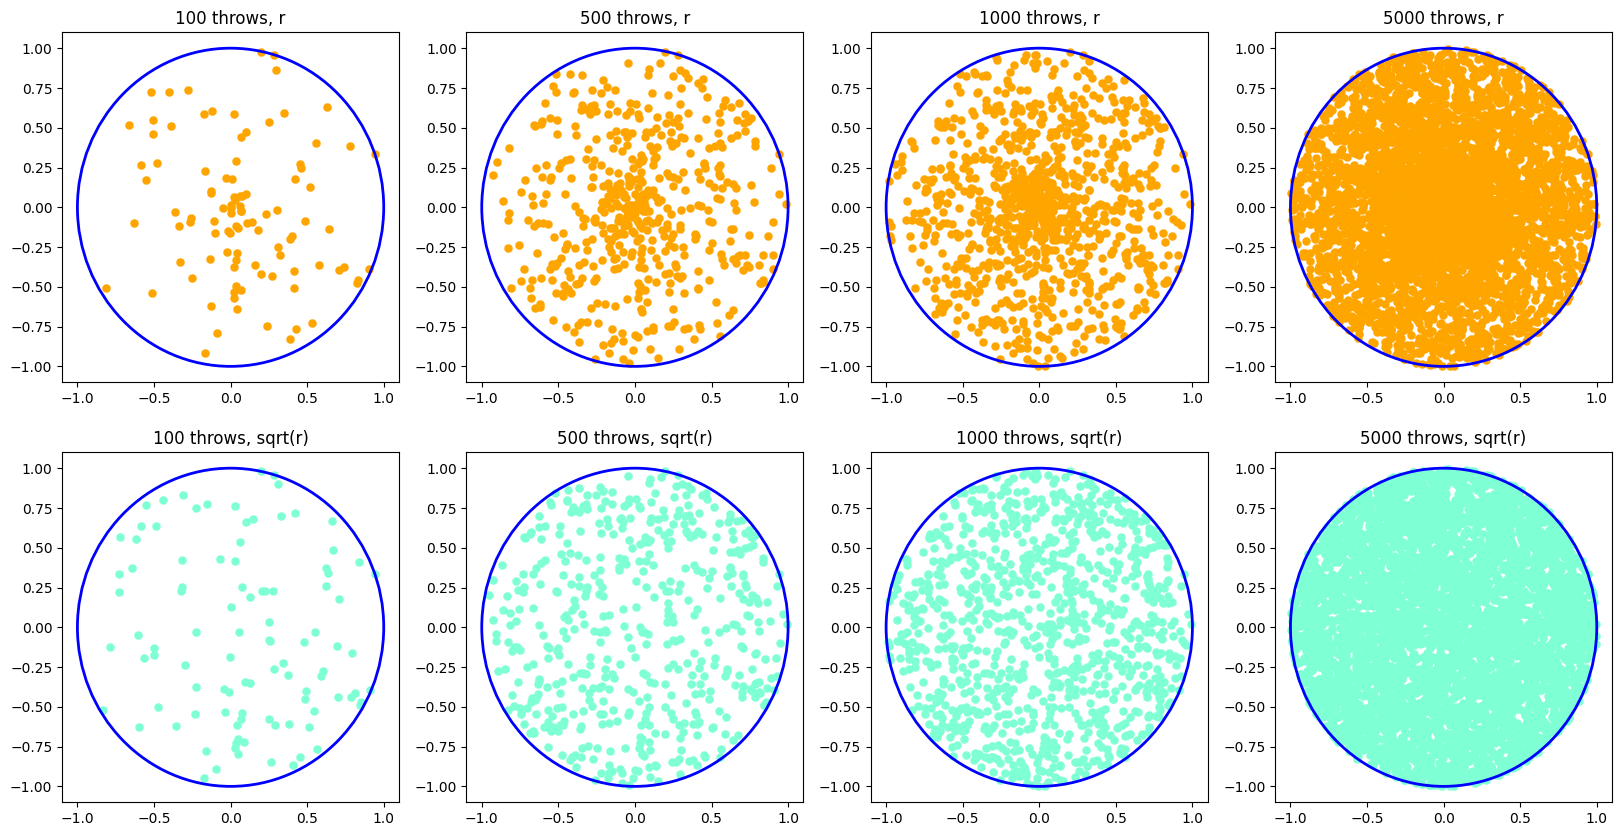

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for j in c:
    for i,num in enumerate(n):
        x,y = load("unit_disk{}_{}.txt".format(num,j))
        ax[j][i].scatter(x, y, linewidths=0.1, color=colors[j], label= "random generated numbers")
        circle = patches.Circle((0, 0), 1, fill=False, color="blue", linewidth=2, label="circle")
        ax[j][i].add_patch(circle)
        ax[j][i].set_title(f"{num} throws, {string[j]}")
plt.show()

## 2.2 Box-Muller transformation

Given a 2D Gaussian with $\mu_x = \mu_y = \mu$ and $\sigma_x = \sigma_y = \sigma$
$$
\rho(x,y) dx dy = \frac{e^{-\frac{{(x-\mu)}^2+{(y-\mu)}^2}{2\sigma^2}}}{2 \pi \sigma^2} dx dy
$$
it is possible to pass into polar coordinates, imposing $x = r \cos{\theta}+\mu$ and $y = r \sin{\theta} + \mu$, $r \in [0, +\infty]$, but in order to simplyfy calculation we can use $s = \frac{r^2}{2 \sigma^2}$, $s \in [0, +\infty]$.
In this framework:
$$
x = \sigma\sqrt{2s}\cos{\theta}+\mu \qquad y = \sigma\sqrt{2s}\sin{\theta}+\mu \\
J_T = \sigma
\begin{vmatrix} 
\frac{\cos{\theta}}{\sqrt{2s}} & -\sqrt{2s}\sin{\theta} \\
\frac{\sin{\theta}}{\sqrt{2s}} & \sqrt{2s}\cos{\theta}
\end{vmatrix} \\
|detJ_T| = \sigma^2\cos{\theta}^2+\sigma^2\sin{\theta}^2 = \sigma^2
$$
Therefore the pdf becomes:
$$
\rho(x,y) dx dy =\rho(s,\theta) ds d\theta = \frac{e^{-s}}{2 \pi} ds d\theta =  \rho_s(s) \rho_\theta(\theta) ds d\theta
$$
Then, it is possible to perform two separate samplings: one for $\rho_\theta(\theta) = \frac{1}{2\pi}$ corresponding to the uniform distribution in $[0,2\pi]$ and one for $\rho_s(s) = e^{-s}$.
In particular, for the latter, the sampling can be performed considering the inverse cdf:
$$
F(s) = c \cdot (1-e^{-s}) \qquad with \quad c=1 \\
F^{-1}(\xi) = - \ln{(1-\xi)}
$$

The sampled coordinates are provided by a C++ script (**ex2.2.cpp** in attachment) in which the user can give in input the number of points to sample and the gaussian parameters $\mu$ and $\sigma$.

In [5]:
n = [10000, 50000, 100000]
mu = [0, 100, 5]
sigma = [1,0.1,10]
colors = ["aquamarine","orange","purple"]

In [6]:
def gauss(x,mean,sigma):
    expon = (x-mean)**2/(2*sigma**2)
    return np.exp(-expon)/(np.sqrt(2*math.pi)*sigma)

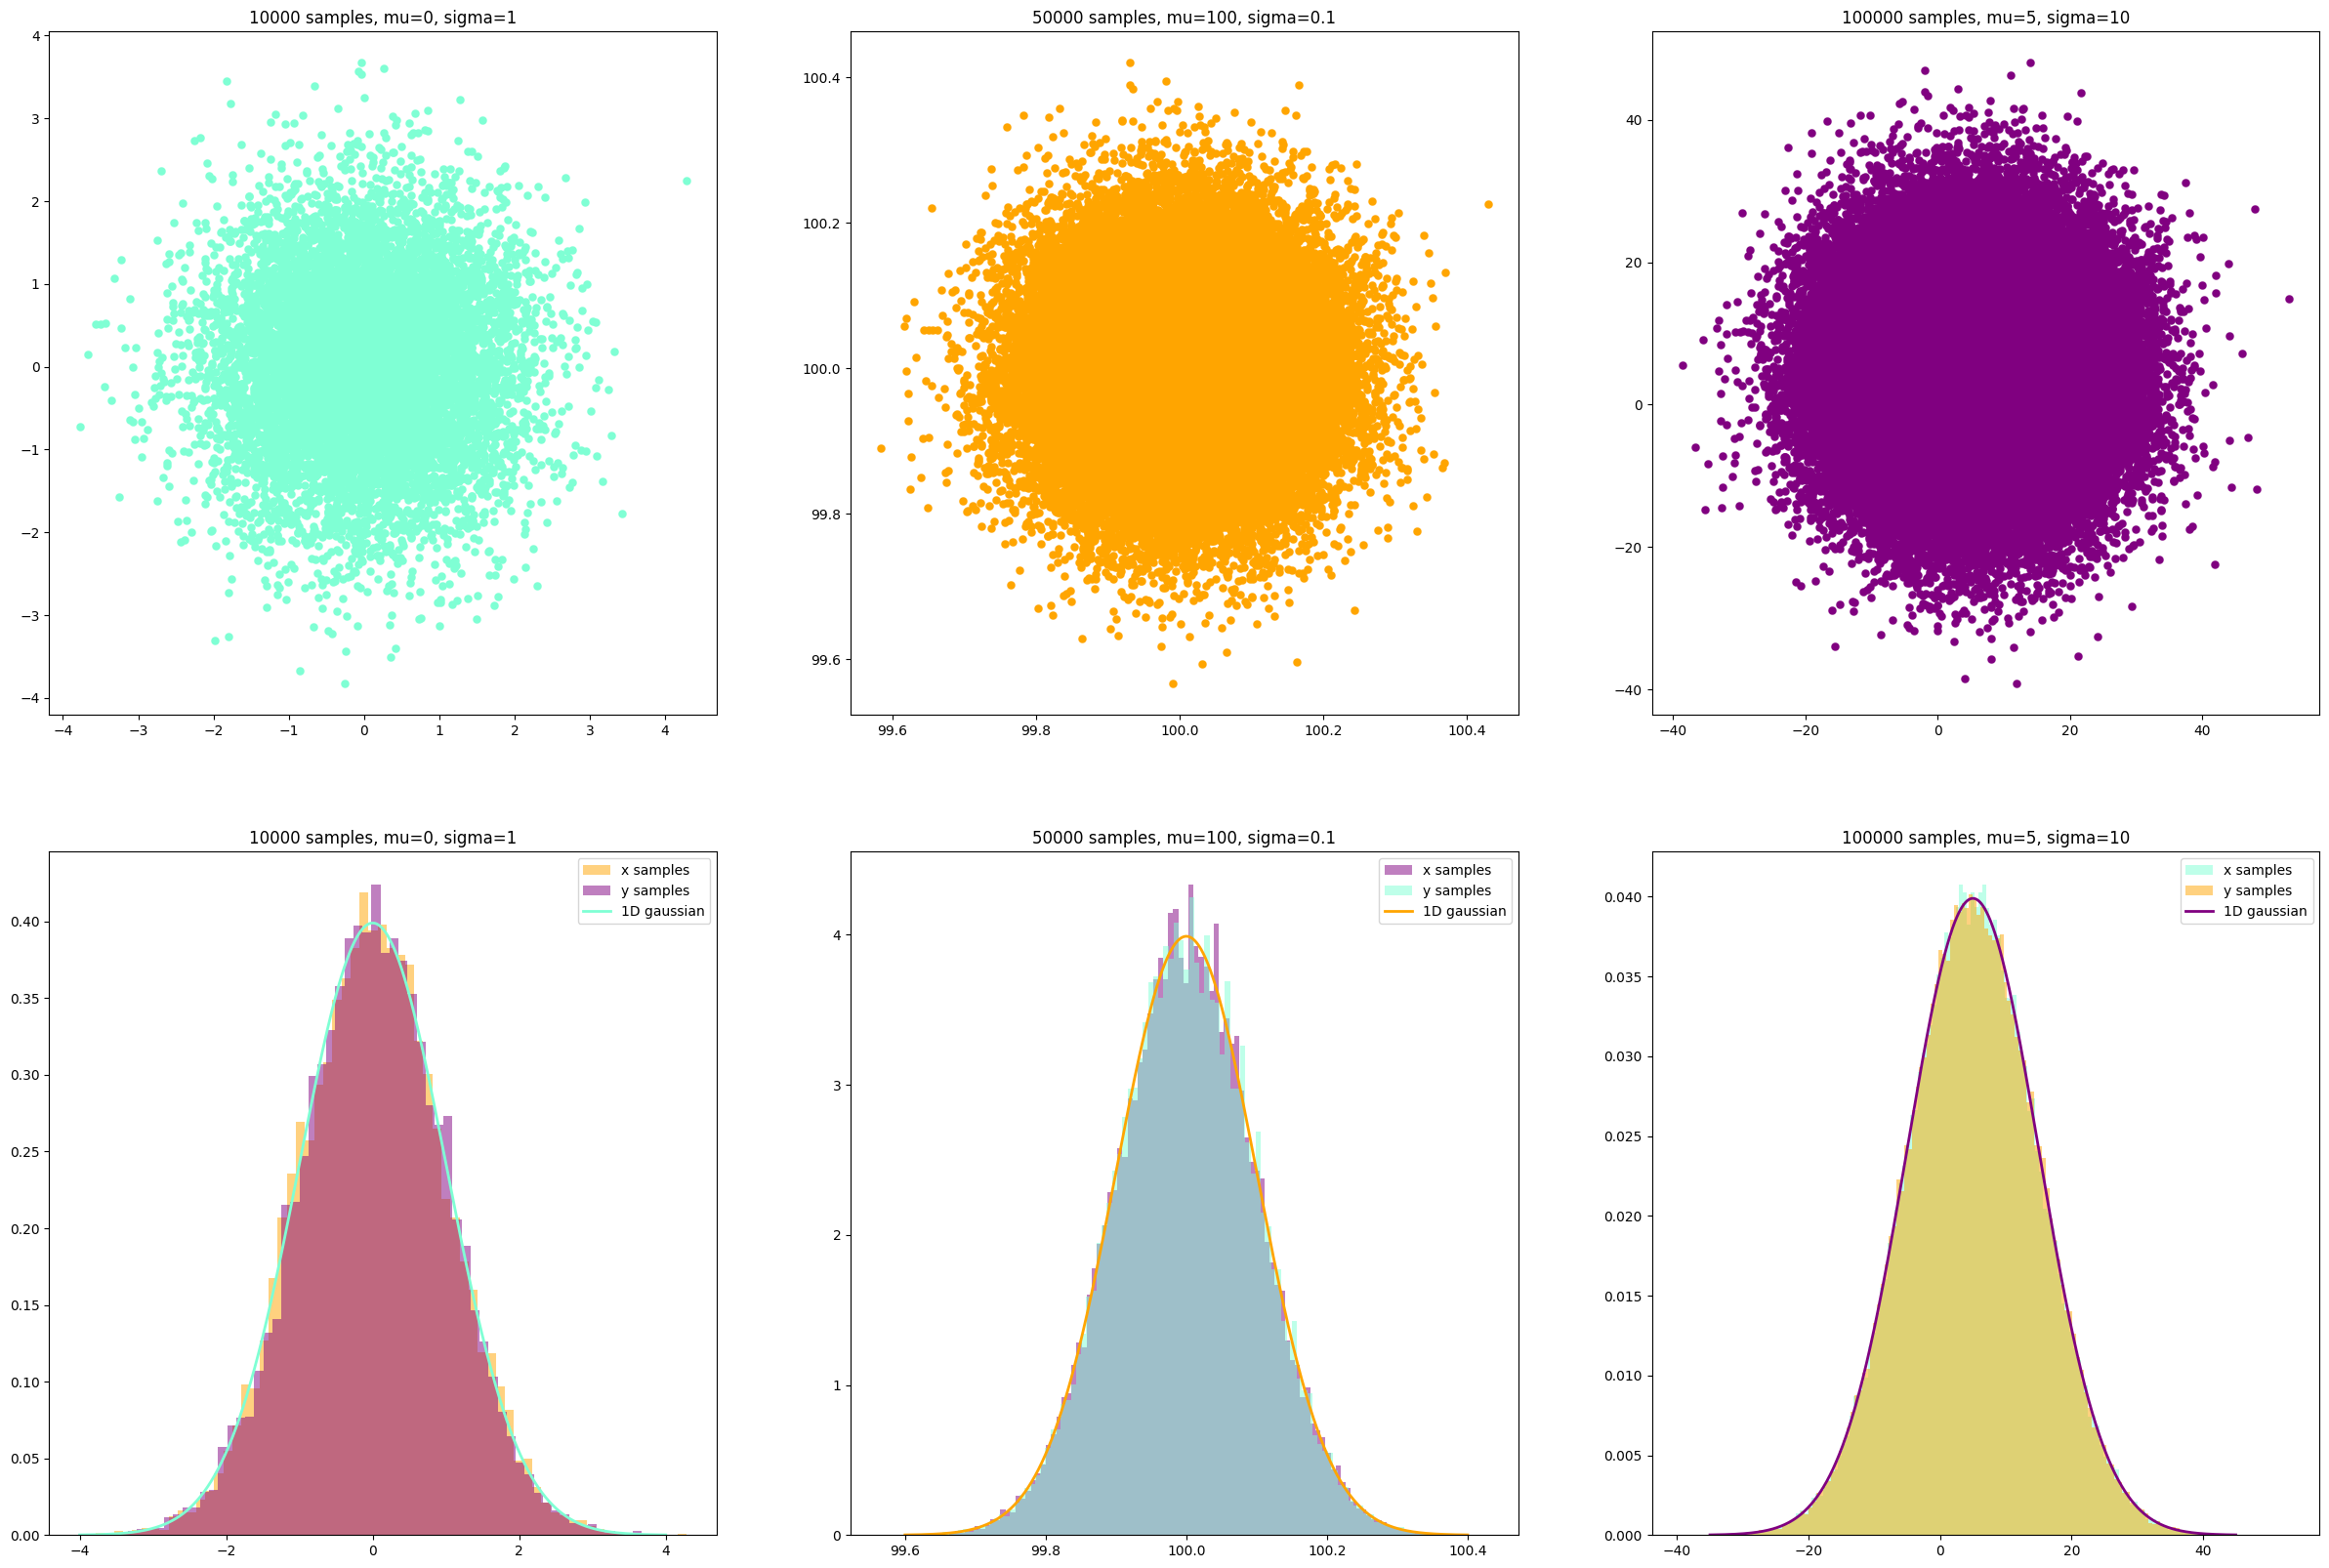

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(30,20))
for i, num in enumerate(n):
    x,y = load("box-muller_n{}_mu{}_sigma{}.txt".format(num,mu[i],sigma[i]))
    ax[0][i].scatter(x, y, linewidths=0.1, color=colors[i])
    ax[0][i].set_title(f"{num} samples, mu={mu[i]}, sigma={sigma[i]}")
    ax[1][i].hist(x, bins="auto", density=True, alpha=0.5, label="x samples", color=colors[(i+1)%3])
    ax[1][i].hist(y, bins="auto", density=True, alpha=0.5, label="y samples", color=colors[(i+2)%3])
    x_range = np.linspace((-4*sigma[i]+mu[i]),(4*sigma[i]+mu[i]),1000)
    ax[1][i].plot(x_range,gauss(x_range,mu[i],sigma[i]), label="1D gaussian", color=colors[i], linewidth=2)
    ax[1][i].set_title(f"{num} samples, mu={mu[i]}, sigma={sigma[i]}")
    ax[1][i].legend()
plt.show()

In the first row, it can observe the distribution of $(x, y)$ pairs generated using the formulas $x = \sigma \sqrt{2s}\cos{\theta}$ and $y = \sigma \sqrt{2s}\sin{\theta}$, where $s$ and $\theta$ are generated as explained previously. In the second row, separate histograms display the frequencies for $x$ and $y$. Since both $x$ and $y$ follow Gaussian distributions with the same parameters, they are compared with each other and with a true 1D Gaussian distribution that shares the same parameters. It can be observed that in all cases, varying the number of throws, $\sigma$ and $\mu$, the distributions match with each other.

## 2.3 Rejection method

To sample from the probability density function (PDF) $f(x)= \sqrt{\frac{2}{\pi}}e^{-x^2}$, the rejection method can be employed. Consider the following function:

$$
g(x) = 
\begin{cases}
A \qquad \qquad \textit{if } 0 \leq x \leq p \\
\frac{A}{p}xe^{p^2-x^2} \qquad  \textit{if } x>p
\end{cases}
$$

where $A$ is the normalization factor. Sampling from $g(x)$ can be done using the inverse sampling technique. Since there exists $c$ such that $f(x) \leq c g(x) \quad \forall x$, the points $x$ sampled from $g(x)$ are accepted only if, given $\xi$ sampled from a uniform distribution, $\xi \geq \frac{f(x)}{cg(x)}$.

The normalization factor is found to be $A=\frac{2p}{2p^2+1}$, therefore the cumulative distribution function (CDF) of g(x) is:

$$
G(x) = 
\begin{cases}
\frac{2p}{2p^2+1}x \qquad \qquad \qquad \qquad \textit{if } 0 \leq x \leq p \\
\frac{1}{2p^2+1}(1-e^{p^2-x^2})+\frac{2p^2}{2p^2+1} \qquad  \textit{if } x>p
\end{cases}
$$

Consequently, the inverse CDF:

$$
G^{-1}(\xi) =
\begin{cases}
\frac{2p^2+1}{2p}\xi \qquad \qquad \qquad \qquad \qquad \quad \textit{if } 0 \leq \xi \leq \frac{2p^2}{2p^2+1} \\
\sqrt{p^2-ln(1-\xi(2p^2+1)+2p^2))} \qquad  \textit{if } \xi > \frac{2p^2}{2p^2+1}
\end{cases}
$$

where $\xi$ points are sampled from a uniform distribution $U(0,1)$.

The sampling has been implemented using a C++ script (**ex2.3.cpp** in attachment). The user can input the number of points to sample and the value of $p$, while $c$ has been chosen such that $c = \frac{2p}{p^2+1} f(0)$ to guarantee that $f(x) \leq c g(x) \quad \forall x$. The script returns the accepted and rejected sampled points in two separate text files.

In the analysis different combination of $p$ and $c$ values are shown, in order to extabilish and then validate that the method is more efficient the more $\frac{f(x)}{c g(x)} \sim const$.

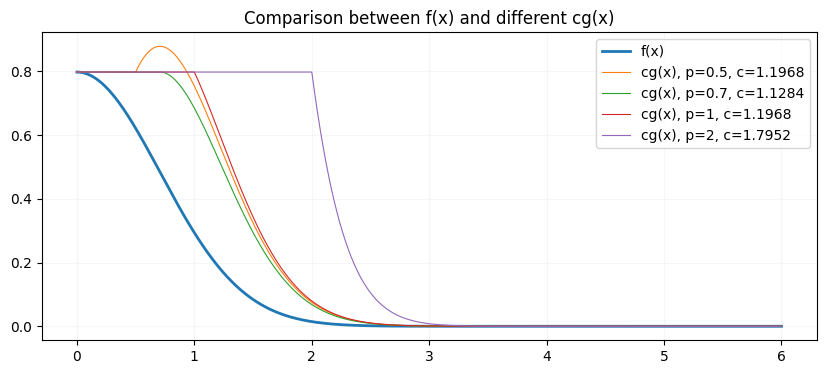

In [8]:
def f(x):
    return np.sqrt(2/math.pi)*np.exp(-x**2)
def g(x,p):
    a = np.zeros(shape=x.shape)
    for i, ics in enumerate(x):
        if ics <= p:
            a[i] = 2*p/(2*p**2+1)
        else:
            a[i] = 2/(2*p**2+1) * ics * np.exp(p**2 - ics**2)
    return a
x_range = np.linspace(0,6,1000)
p_range = [0.5,0.7,1,2]
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_range, f(x_range), label="f(x)", linewidth=2)
for i,p in enumerate(p_range):
    c = (2*p**2+1)/(2*p)*f(0)
    ax.plot(x_range, c*g(x_range,p), label="cg(x), p={}, c={}".format(p, round(c,4)), linewidth=0.8)
ax.set_title("Comparison between f(x) and different cg(x)")
ax.legend()
ax.grid(alpha=0.1)
plt.show()

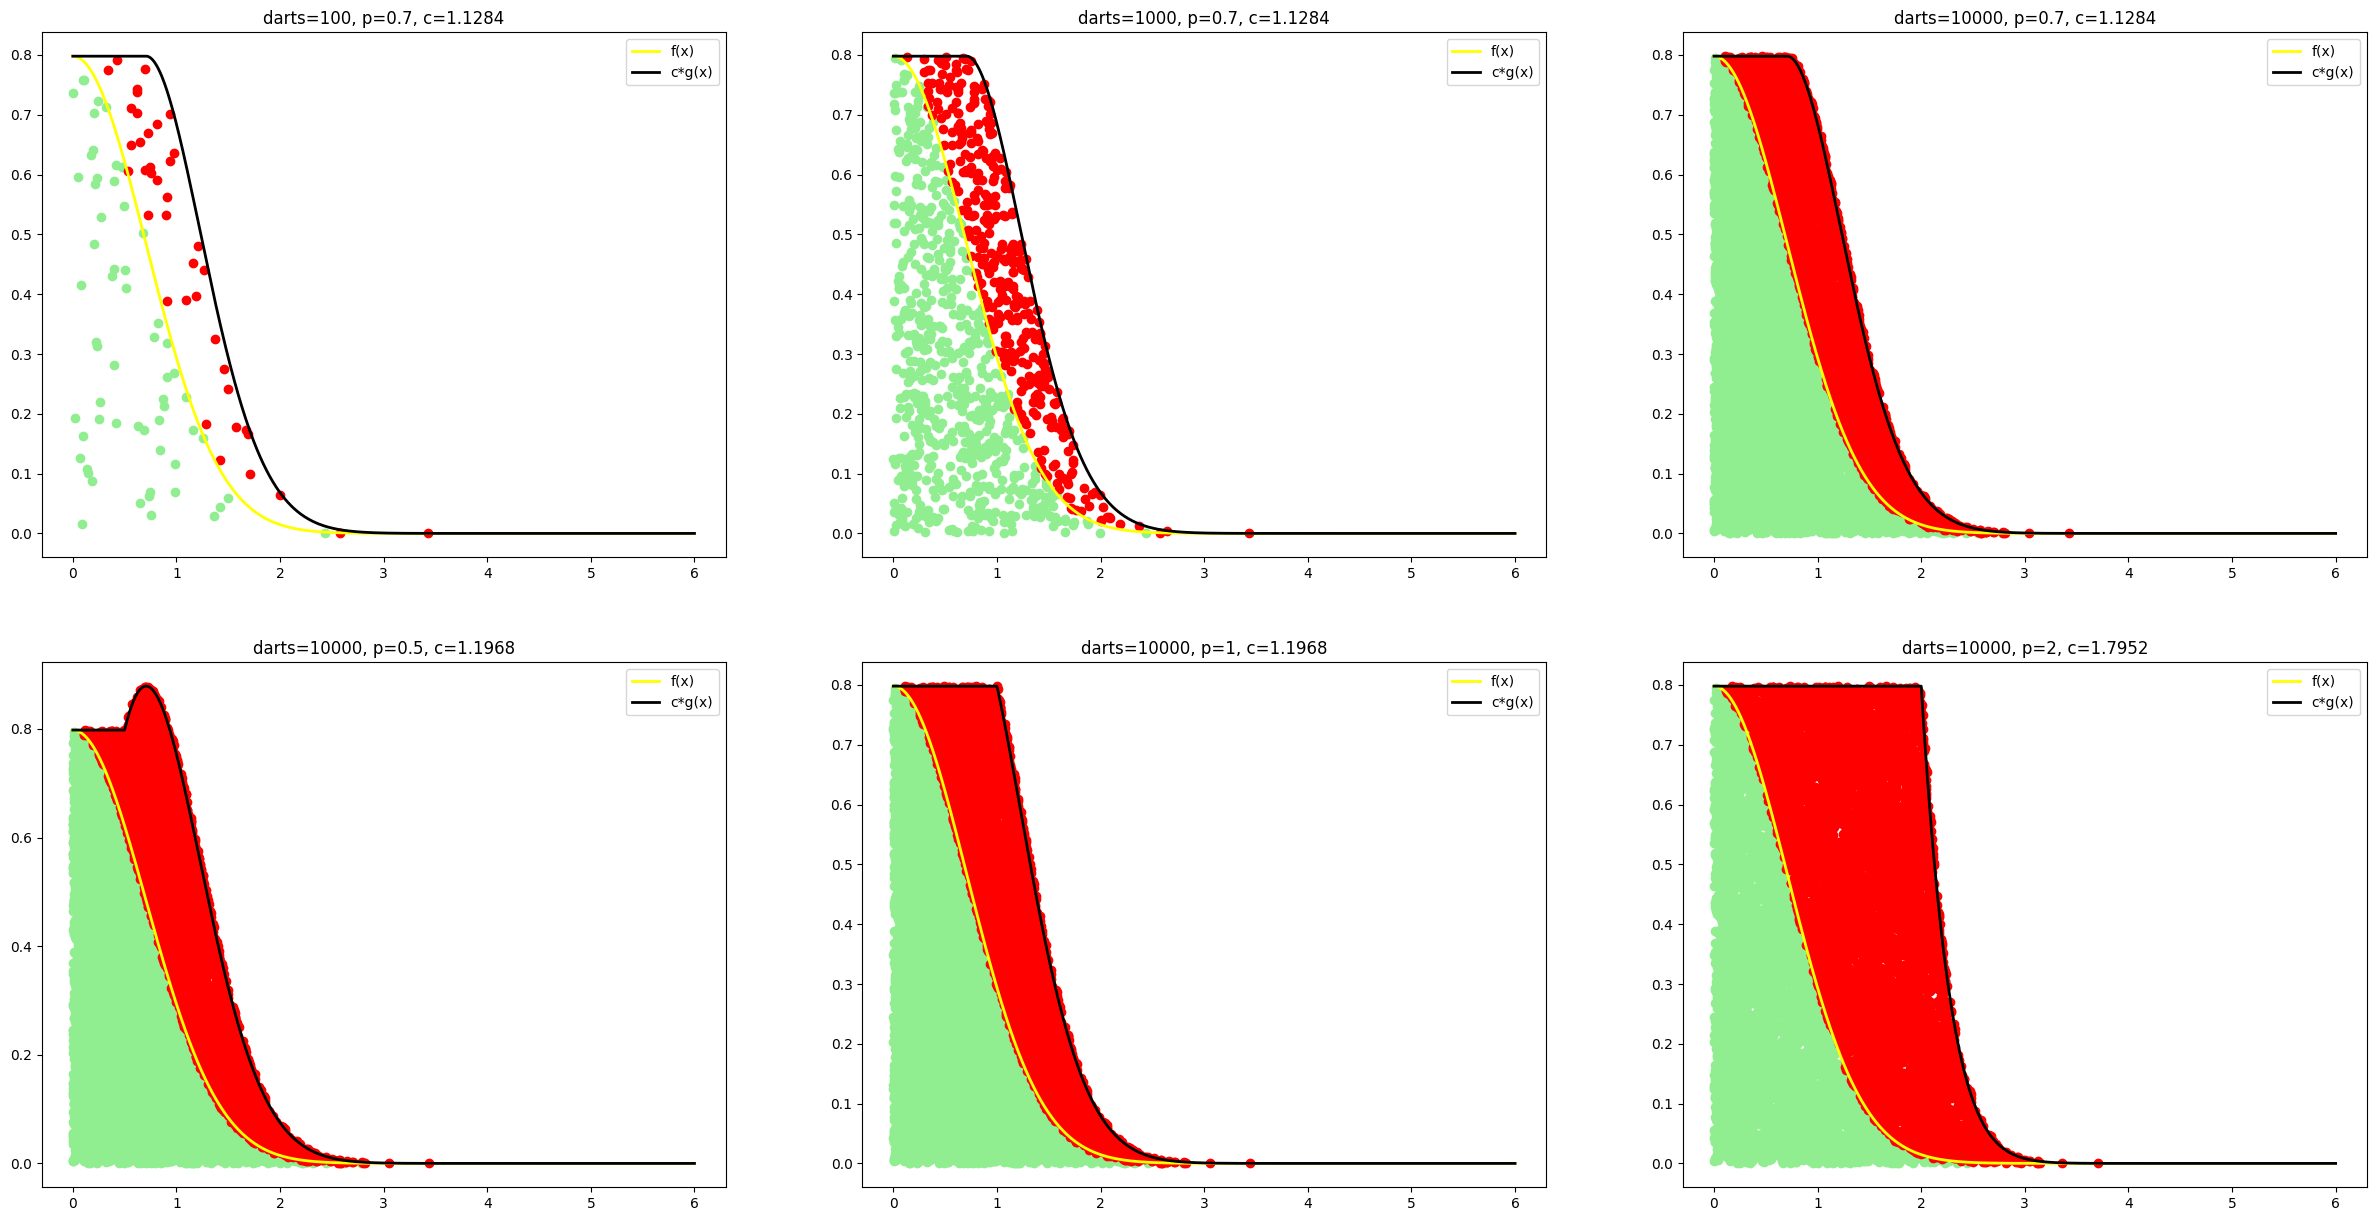

In [10]:
parameters = [(100,0.7,1.1284),(1000,0.7,1.1284),(10000,0.7,1.1284),(10000,0.5,1.1968),(10000,1,1.1968),(10000,2,1.7952)]
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(30,15))
for i,triple in enumerate(parameters):
    x_ok, chi_ok = load("rejection_n{}_p{}_ok.txt".format(triple[0],triple[1]))
    x_no, chi_no = load("rejection_n{}_p{}_no.txt".format(triple[0],triple[1]))
    ax[(i//3)][(i%3)].plot(x_range, f(x_range), label = "f(x)",linewidth=2,color="yellow")
    ax[(i//3)][(i%3)].scatter(x_ok,np.array(chi_ok)*triple[2]*g(np.array(x_ok),triple[1]), color="lightgreen")
    ax[(i//3)][(i%3)].scatter(x_no,np.array(chi_no)*triple[2]*g(np.array(x_no),triple[1]), color="red")
    ax[(i//3)][(i%3)].plot(x_range, triple[2]*g(x_range,triple[1]), label = "c*g(x)",color="black",linewidth=2)
    ax[(i//3)][(i%3)].set_title("darts={}, p={}, c={}".format(triple[0],triple[1],triple[2]))
    ax[(i//3)][(i%3)].legend(loc="best")
plt.show()

In the first row of the plot, the results for the optimal values of $p$ and $c$ are displayed for different numbers of darts. It can be observed that the two distributions are close, leading to consistently fewer rejected points compared to accepted ones.

In the second row, the results for other promising combinations of $p$ and $c$ are presented, with a fixed number of throws $n=10000$. It is evident that these combinations are suboptimal, especially in the case of $p=2$ and $c=1.796$, where the number of rejected points increases, resulting in inefficient utilization of computational resources for this algorithm.